In [17]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

from os import listdir
from os.path import isfile, join

In [18]:
img_dir = '../resources/Proj1.4/Proj1.4'
report_img_dir = '../report/p1_4/img'
imgs = sorted([f'{img_dir}/{f}' for f in listdir(img_dir) if isfile(join(img_dir, f))])
img_mats_BGR = [cv2.imread(image) for image in imgs]
img_mats_gray = [cv2.imread(image, cv2.IMREAD_GRAYSCALE) for image in imgs]

In [19]:
def show_images(images, list_captions=None, grid_size=(1, 4), figsize=(10, 10), save_path=None):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, image in enumerate(images):
        if isinstance(image, str):
            image = cv2.imread(image)
        if i < len(axes) and image is not None:
            axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            if list_captions:
                axes[i].set_title(list_captions[i], fontsize=10)
            axes[i].axis('off')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

In [20]:
def show_plots(plot_functions, grid_size=(1, 4), figsize=(20, 20)):
    rows, cols = grid_size
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    if rows * cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, plot_func in enumerate(plot_functions):
        if i < len(axes):
            plot_func(axes[i])
            axes[i].axis('on')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [21]:
def scale_img(image, uint8=True):
    min_val = np.min(image)
    max_val = np.max(image)
    scaled_image = 255 * (image - min_val) / (max_val - min_val)
    if uint8:
        return scaled_image.astype(np.uint8)
    scaled_image[scaled_image < 0] = 0
    scaled_image[scaled_image > 255] = 255
    return scaled_image

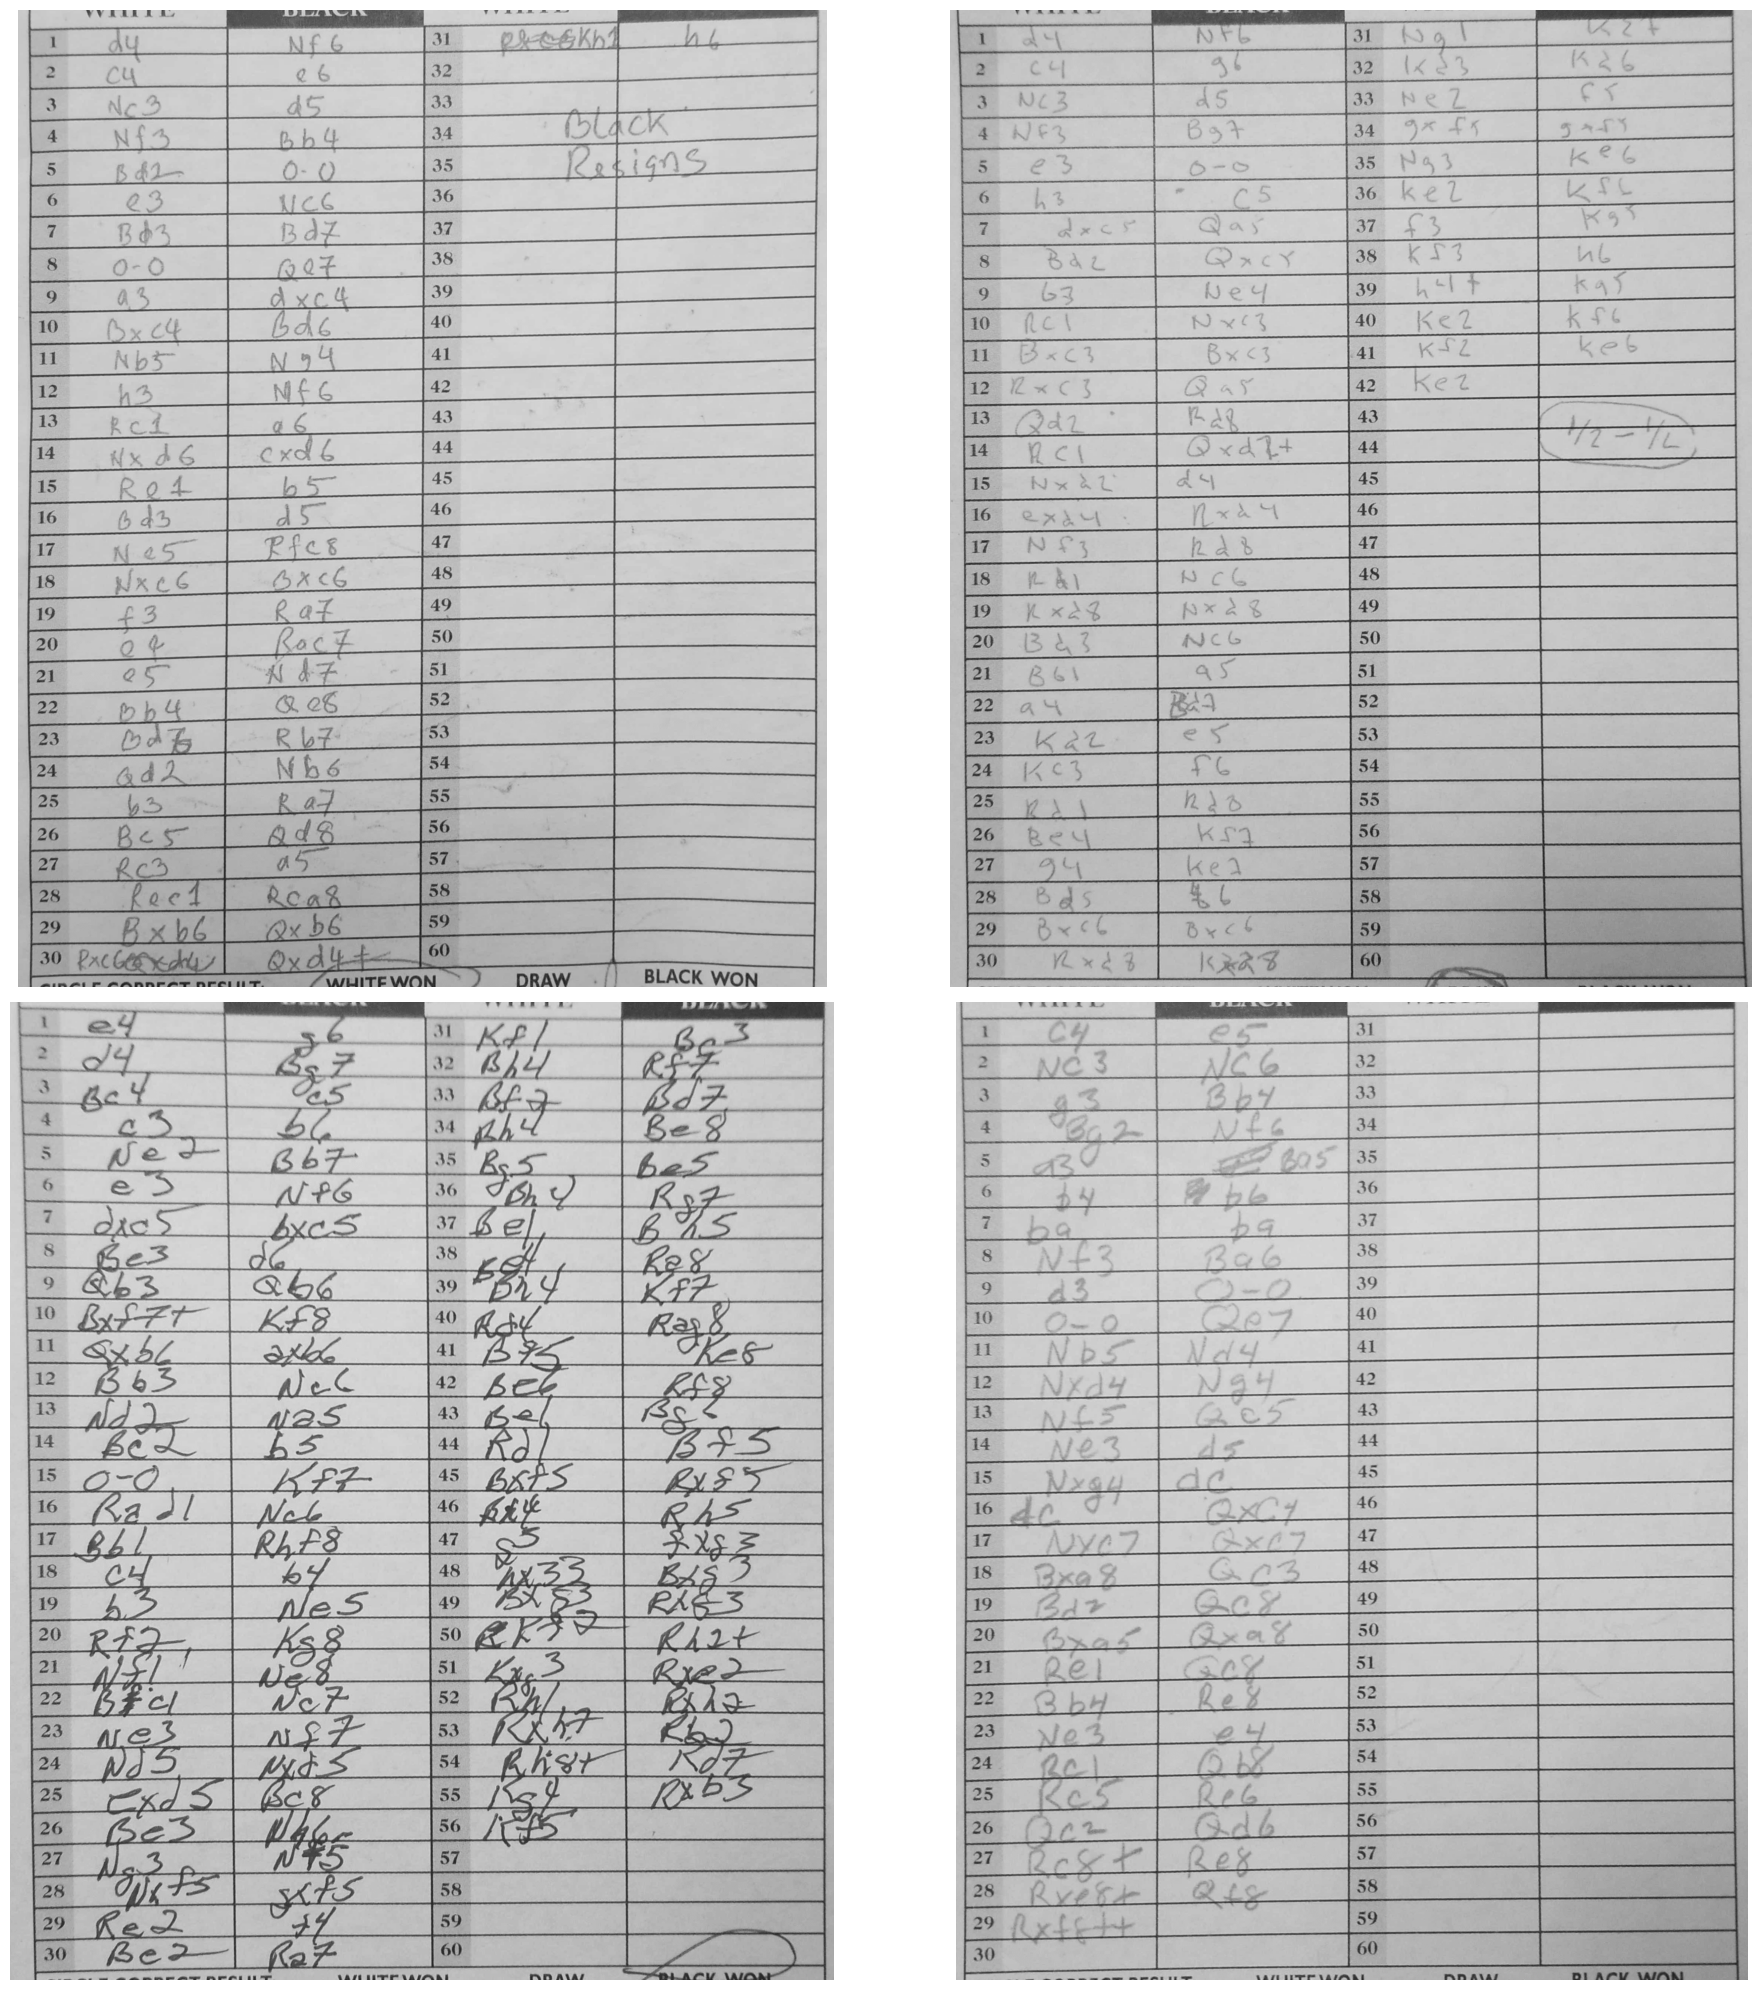

In [22]:
show_images(img_mats_gray, grid_size=(2, 2), figsize=(20, 20))

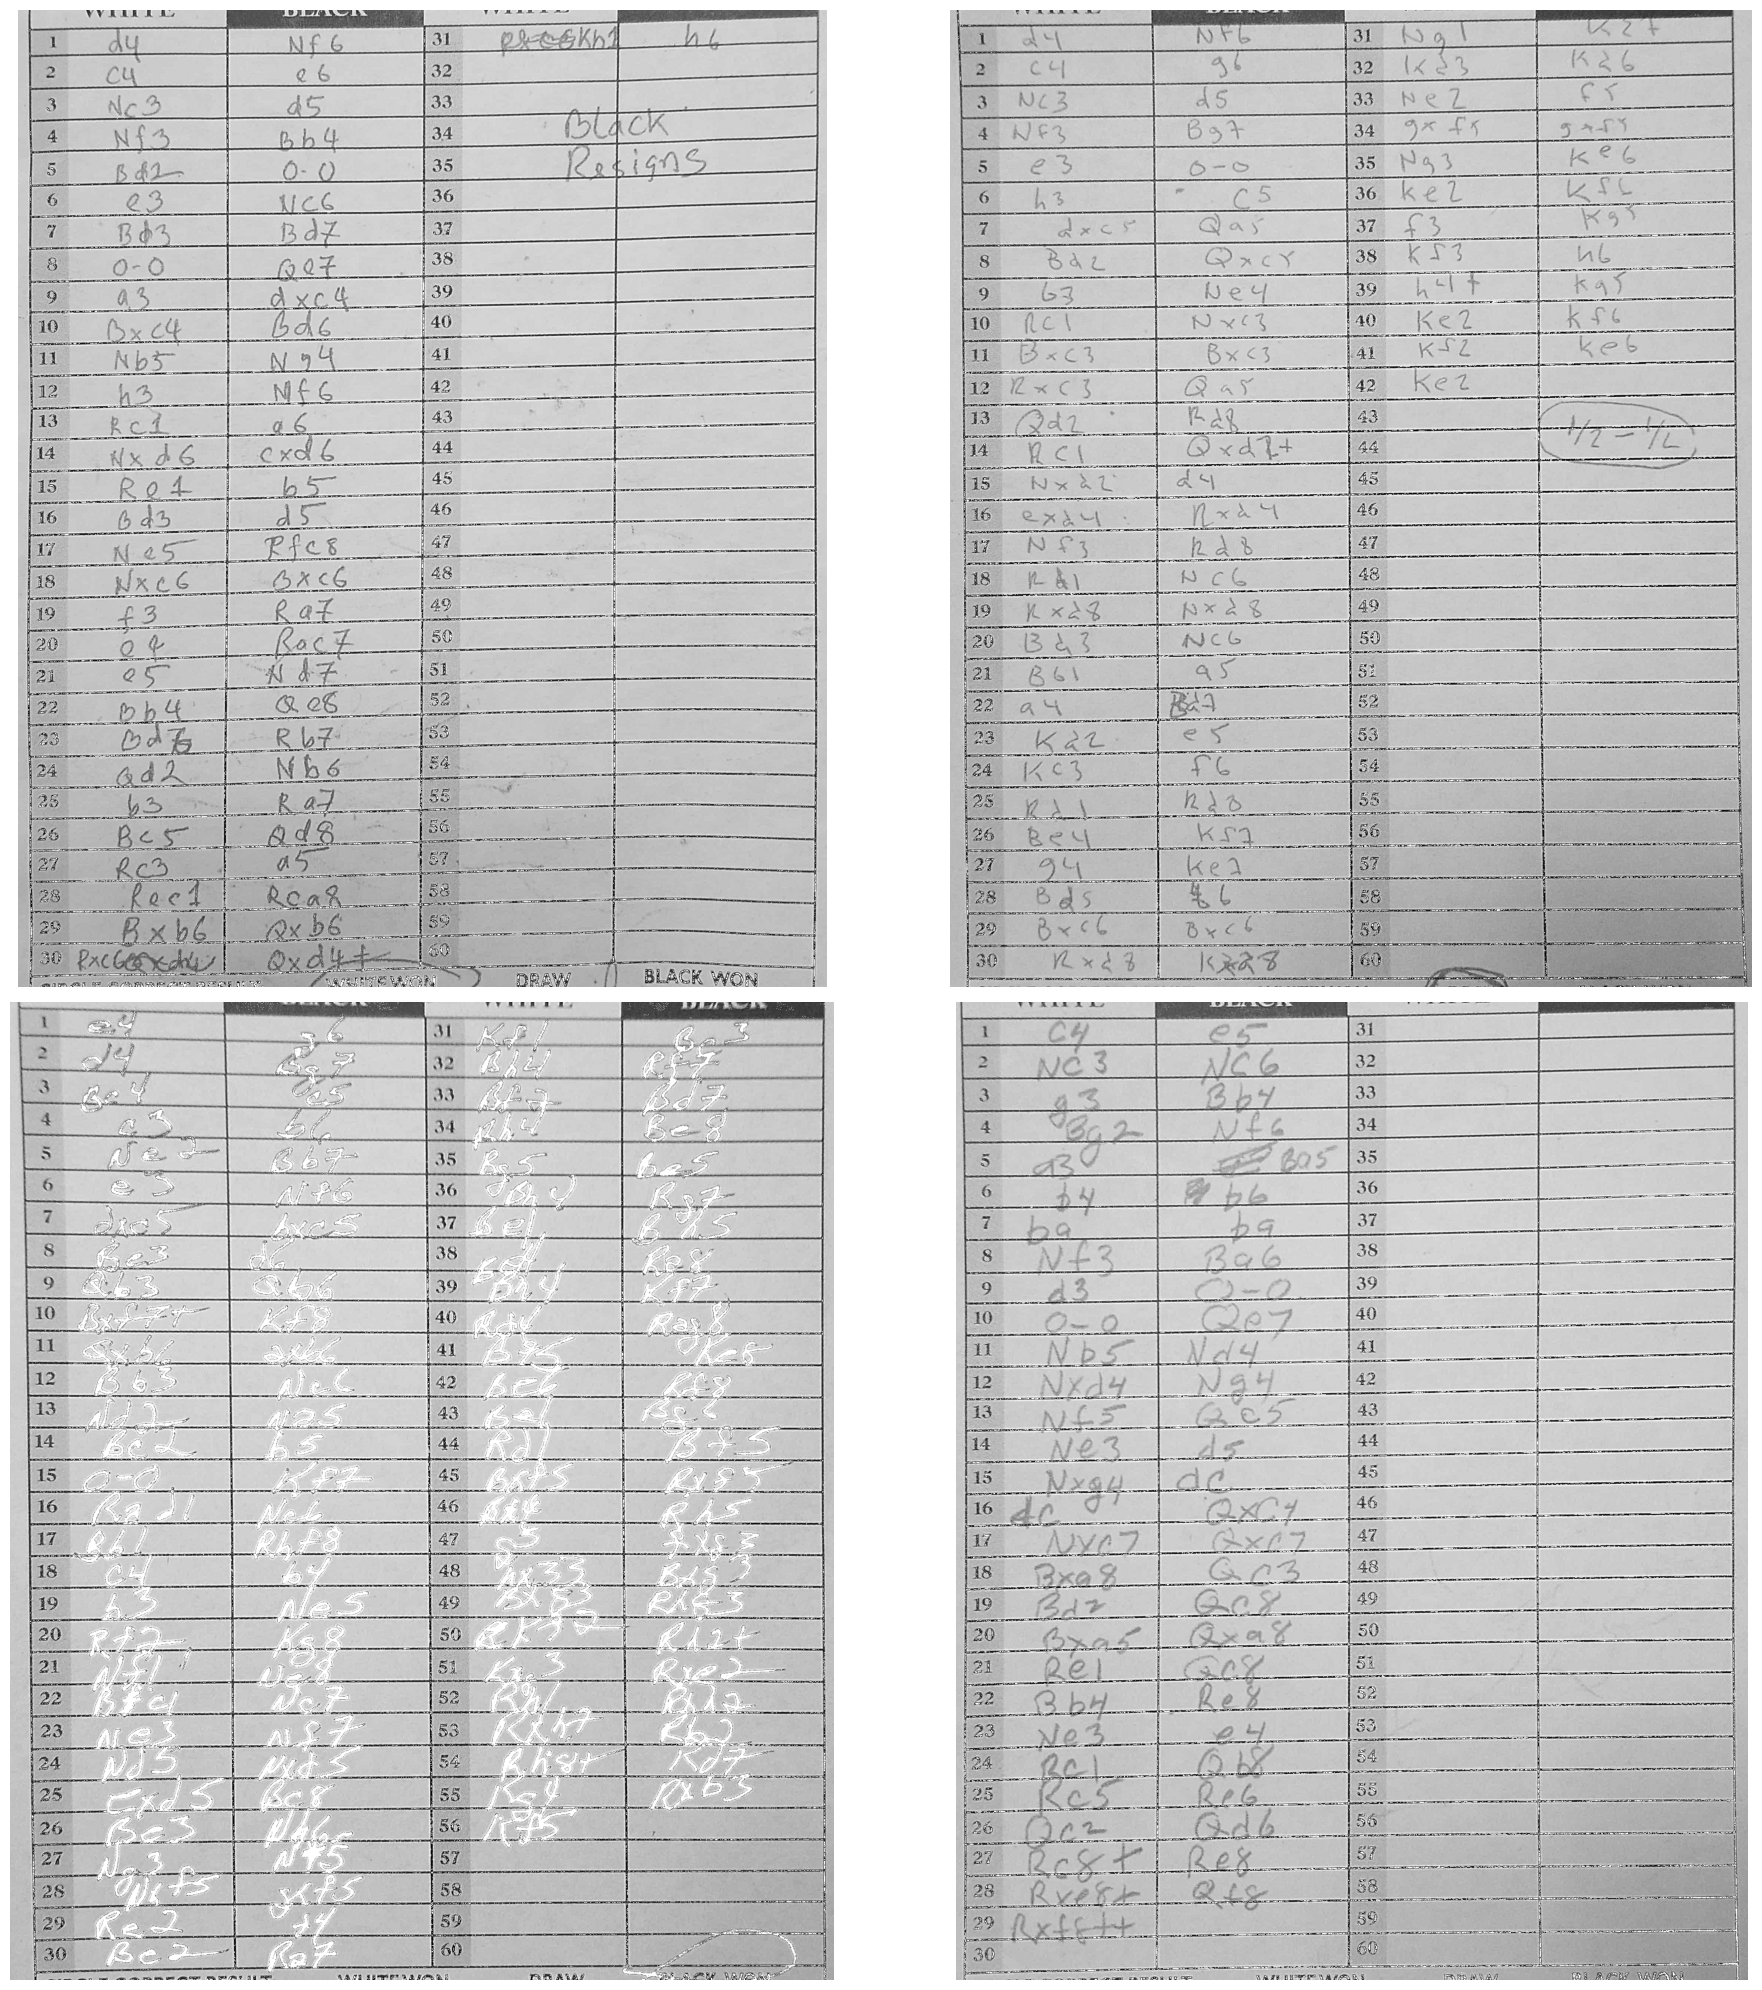

In [23]:
filtered_imgs = []

for colored_img in img_mats_BGR:
    
    gaussian = cv2.GaussianBlur(colored_img, (0, 0), 2.0)
    sharpened_image = cv2.addWeighted(colored_img, 2.0, gaussian, -1.0, 0)

    hsv_img = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2HSV)
    sat = hsv_img[:, :, 1]
    high_sat = sat > 120
    sharpened_image[high_sat] = [255, 255, 255]
    sharpened_image = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
    filtered_imgs.append(sharpened_image)


show_images(filtered_imgs, grid_size=(2, 2), figsize=(20, 20))

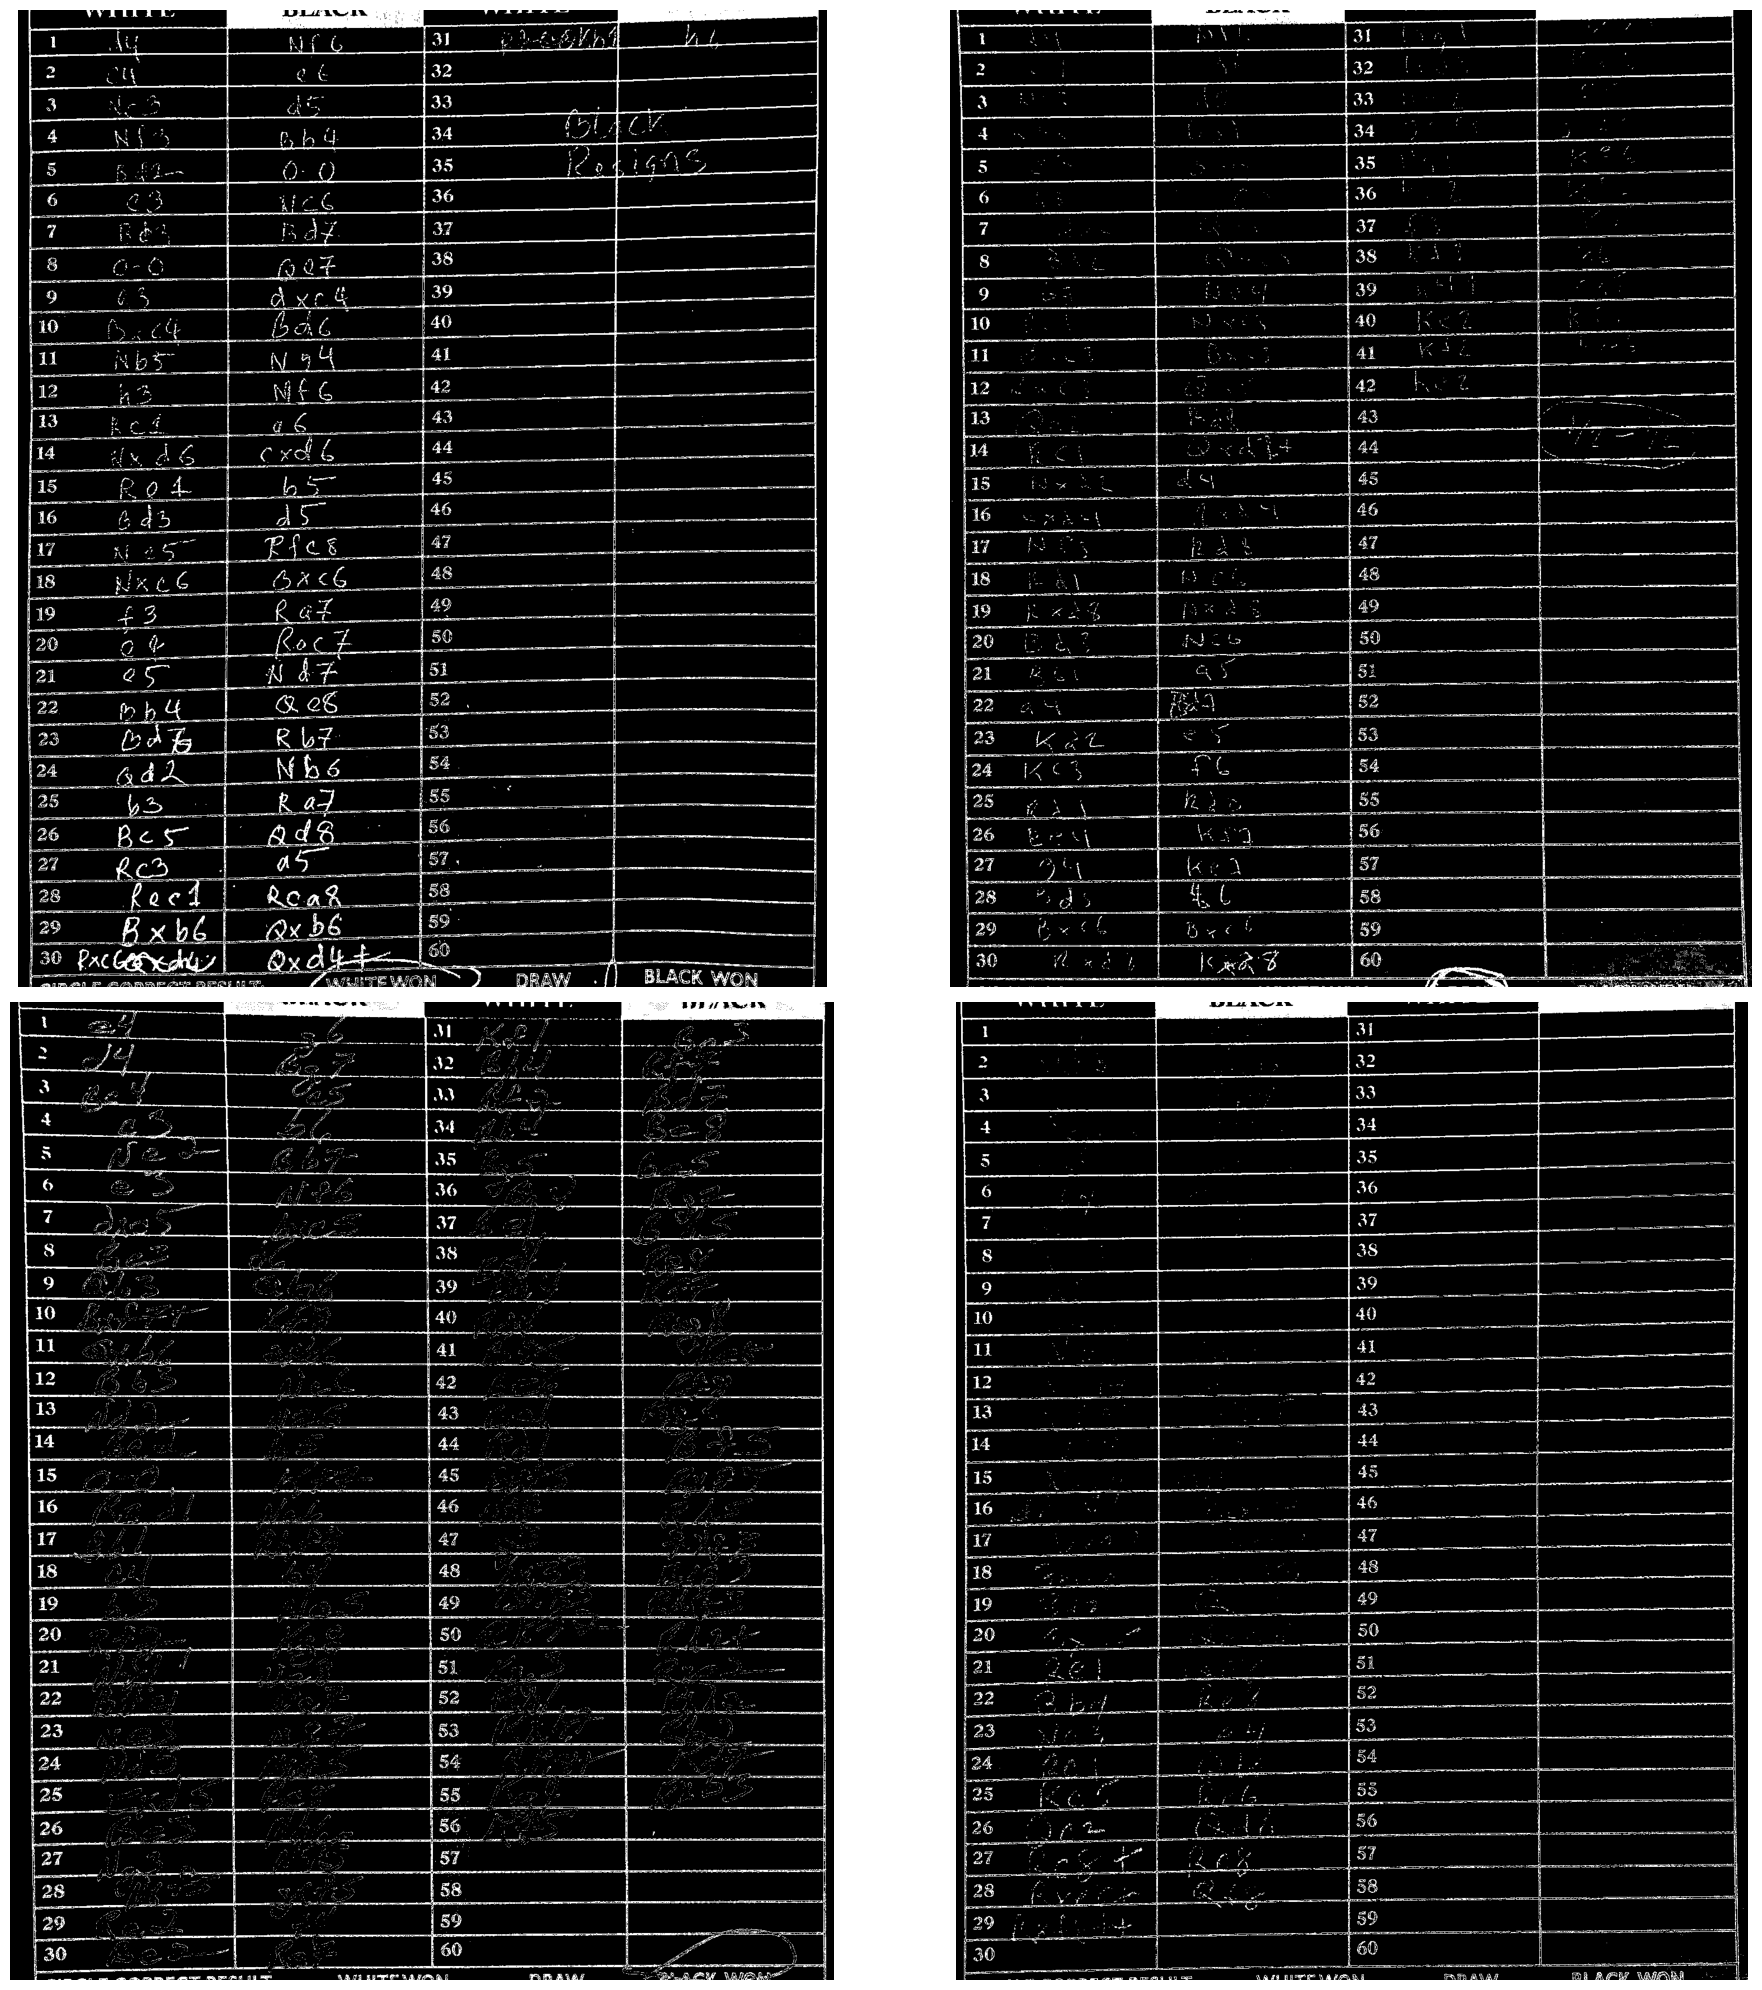

In [24]:
inverted_bin_img = []
for img in filtered_imgs:
    tmp_img = (255*(img / 255) ** 1).astype('uint8')
    inverted_bin_img.append(cv2.threshold(~tmp_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1])

show_images(inverted_bin_img, grid_size=(2, 2), figsize=(20, 20))

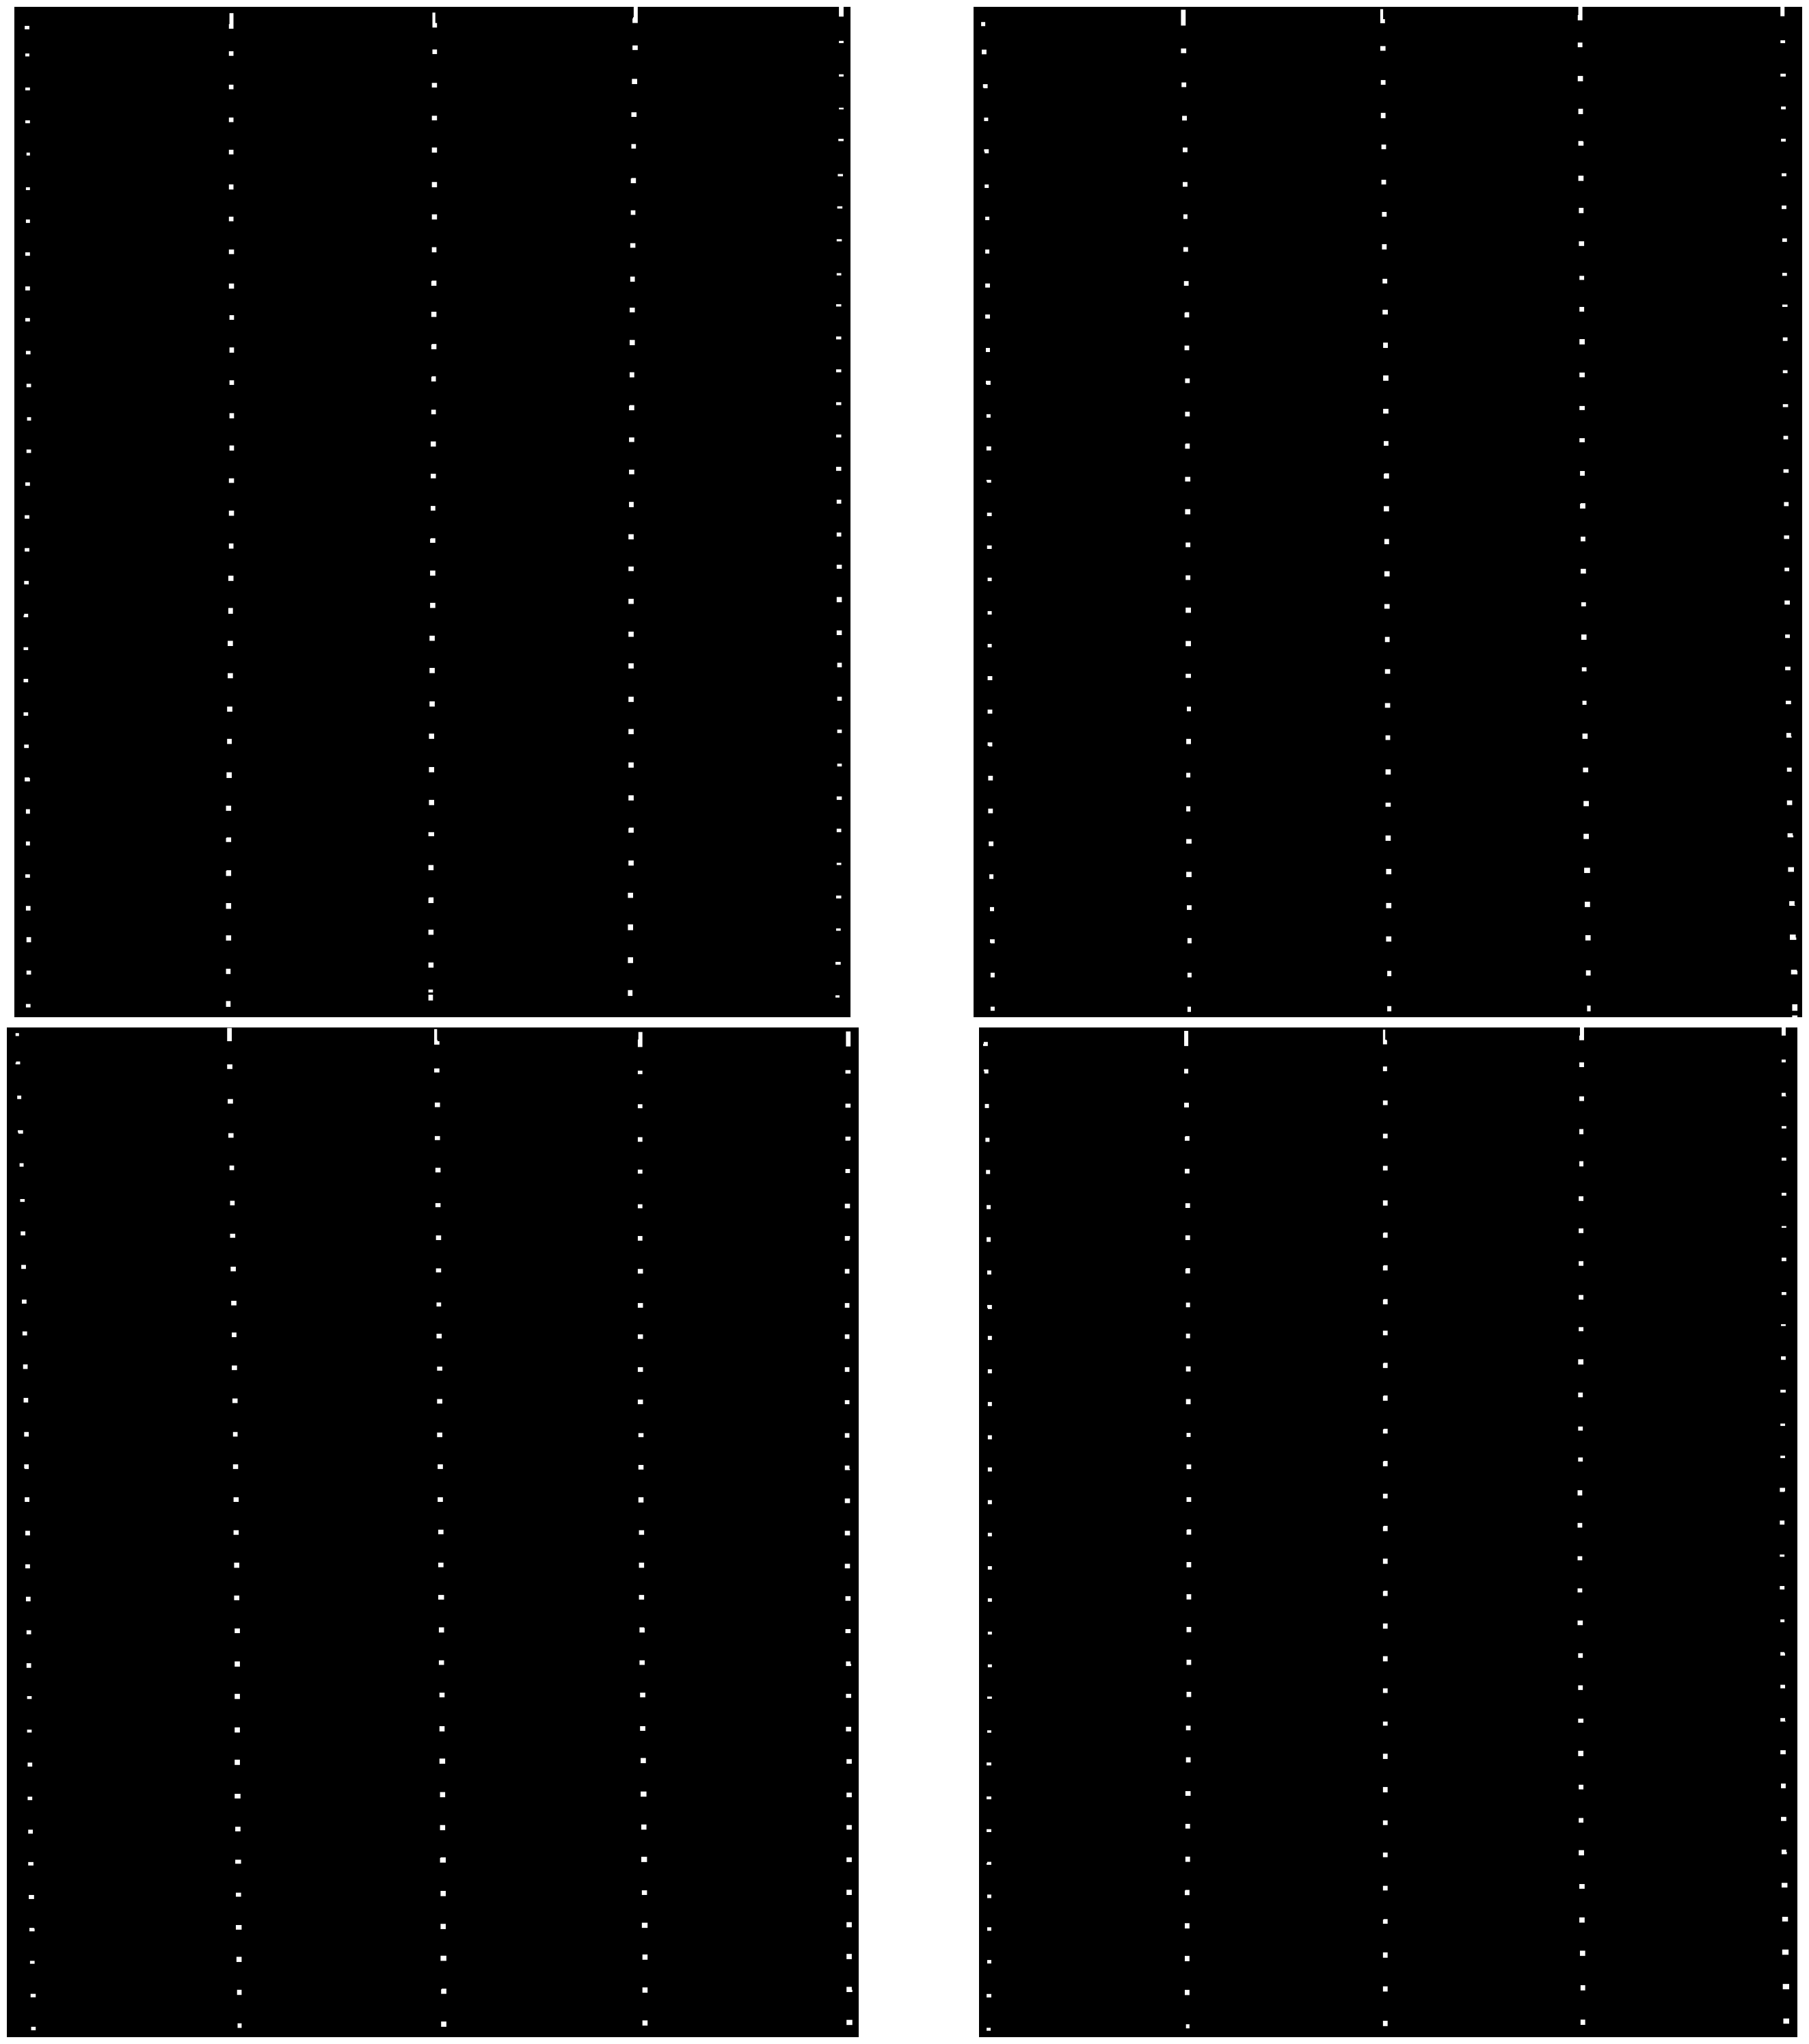

In [31]:
d_a = 140
d_b = 3

se_h = cv2.getStructuringElement(cv2.MORPH_RECT, (d_a, d_b))
se_v = cv2.getStructuringElement(cv2.MORPH_RECT, (d_b, d_a))

masks = []
for img in inverted_bin_img:

    tmp_img = cv2.morphologyEx(
        img, op=cv2.MORPH_DILATE, kernel=np.ones((6, 6))
    )

    mask_h = cv2.morphologyEx(
        tmp_img, op=cv2.MORPH_OPEN, kernel=se_h
    )

    mask_v = cv2.morphologyEx(
        tmp_img, op=cv2.MORPH_OPEN, kernel=se_v
    )

    mask = cv2.bitwise_and(mask_h, mask_v)
    # mask = cv2.dilate(mask, np.ones((5, 5)))

    masks.append(mask)

show_images(masks, grid_size=(2, 2), figsize=(30, 30))